线性模型 $y = \theta{x}$ 是最简单的模型，
假设模型参数 $\theta$ 是一组待求的变量，则其可被写为超定方程组 $X\theta = y$ 形式，
$$
J_{LS}(\theta)= \cfrac{1}{2}\parallel{X}\theta-y\parallel^2 \tag{1}
$$
假设使用式子(1)所示的最小二乘法(Least Squares)作为损失函数，通过梯度下降的方法能够求解$\theta$，<br>
或者直接通过广义伪逆矩阵求解上述超定方程组，
$$
\hat{\theta}_{LS} = (X^{T}X)^{-1}X^{T}y\tag{2}
$$

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [106]:
scaler = MinMaxScaler()
boston = load_boston()

In [107]:
X = scaler.fit_transform(boston.data)
y = boston.target

In [108]:
"""
  先做数据预处理再划分数据集
  不对数据预处理的情况之下三种模型的 Score 效果都不太好
   score of ridge = 0.6946587927151531  
   score of lasso = 0.6751515282313649
   score of linrg = 0.6979542626006041
"""
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [109]:
## 这是用于展示的数据，不需要归一化处理
df = pd.DataFrame(
    data = np.hstack([boston.data, boston.target.reshape(boston.target.shape[0], 1)]), 
    columns =np.hstack([boston.feature_names, ["Price"]]),
)

In [110]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [112]:
ridge = Ridge()
lasso = Lasso()
linrg = LinearRegression()

In [116]:
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
linrg.fit(x_train, y_train)

"""
此处会发现另外一个有趣的事情, 数据预处理之后
  （1）归一化之后 ridge 与 linrg 模型评分上升了；
  （2）经过数据预处理 lasso 模型评分不但没有上升反而大幅下降；
"""

print(ridge.score(x_test, y_test))
print(lasso.score(x_test, y_test))
print(linrg.score(x_test, y_test))

0.7107214227569043
0.12283667227317341
0.726201344231029


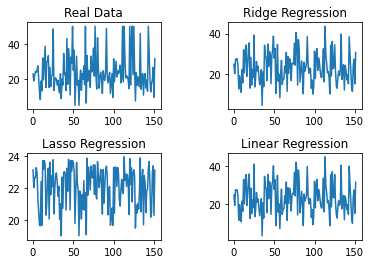

In [117]:
plt.subplots_adjust(
    left = None,
    right = None,
    top = None, 
    bottom = None,
    wspace = 0.5, 
    hspace = 0.5
)

y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_linrg = linrg.predict(x_test)

plt.subplot(2, 2, 1)
plt.plot(y_test, label = "real")
plt.title("Real Data")

plt.subplot(2, 2, 2)
plt.plot(y_pred_ridge, label = "Ridge")
plt.title("Ridge Regression")

plt.subplot(2, 2, 3)
plt.plot(y_pred_lasso, label = "Lasso")
plt.title("Lasso Regression")

plt.subplot(2, 2, 4)
plt.plot(y_pred_linrg, label = "Linear")
plt.title("Linear Regression")

plt.show()

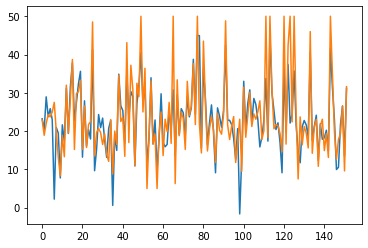

In [144]:
## 通过式子(2)直接算出解析解
pseudo_inv = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T)
parsing_solu = pseudo_inv.dot(y_train)

## 绘图查看效果
plt.plot(x_test.dot(parsing_solu))
plt.plot(y_test)
plt.show()